GlucForecast v.1

In [28]:
import pandas as pd
import numpy as np


data_from_cap = pd.read_csv("/content/adolescent#001-train-processed.csv")
"""
'Time' : the timestamp of the data point, indicating when the observation was recorded. It is in the format 'MM/DD/YYYY HH:mm'
'BG' :  the blood glucose level at a particular time. mg/dL
"""
data_from_cap.head(20)

,Time,BG,Date,Hour
0,2019-05-01 00:00:00,149.020000,2019-05-01,0
1,2019-05-01 00:03:00,149.020000,2019-05-01,0
2,2019-05-01 00:06:00,149.020000,2019-05-01,0
3,2019-05-01 00:09:00,149.020000,2019-05-01,0
4,2019-05-01 00:12:00,149.020000,2019-05-01,0
5,2019-05-01 00:15:00,149.020000,2019-05-01,0
6,2019-05-01 00:18:00,149.020000,2019-05-01,0
7,2019-05-01 00:21:00,149.020000,2019-05-01,0
8,2019-05-01 00:24:00,149.020001,2019-05-01,0
9,2019-05-01 00:27:00,149.020002,2019-05-01,0


In [11]:
data_from_cap.describe()

,BG,Hour
count,36480.000000,36480.000000
mean,147.041818,11.500000
std,22.482711,6.922281
min,84.908195,0.000000
25%,133.512218,5.750000
50%,144.624992,11.500000
75%,163.178230,17.250000
max,223.286543,23.000000


In [16]:
data_from_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36480 entries, 0 to 36479
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    36480 non-null  object 
 1   BG      36480 non-null  float64
 2   Date    36480 non-null  object 
 3   Hour    36480 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


NaN values detection

In [18]:
data_from_cap.isnull().sum()

Time    0
BG      0
Date    0
Hour    0
dtype: int64

Outliers Dteetction

In [19]:
def detect_outliers(data,column,q1=.25,q3=.75):
    quantile1 = data[column].quantile(q1)
    quantile3 = data[column].quantile(q3)
    IQR =  quantile3 - quantile1
    up_limit = quantile3 + (IQR*1.5)
    low_limit = quantile1 - (IQR*1.5)

    return up_limit, low_limit

detect_outliers(data_from_cap,'BG')

(207.67724896250004, 89.01319926249997)

In [29]:
# Convert Date column to datetime
data_from_cap.Time = pd.to_datetime(data_from_cap.Time,dayfirst=True).dt.strftime('%d-%m-%Y %H:%M')
data_from_cap.BG = data_from_cap.BG.astype(int)
data_from_cap_processed = data_from_cap.iloc[:,:2]
data_from_cap_processed.head(20)

,Time,BG
0,01-05-2019 00:00,149
1,01-05-2019 00:03,149
2,01-05-2019 00:06,149
3,01-05-2019 00:09,149
4,01-05-2019 00:12,149
5,01-05-2019 00:15,149
6,01-05-2019 00:18,149
7,01-05-2019 00:21,149
8,01-05-2019 00:24,149
9,01-05-2019 00:27,149


data visualisation

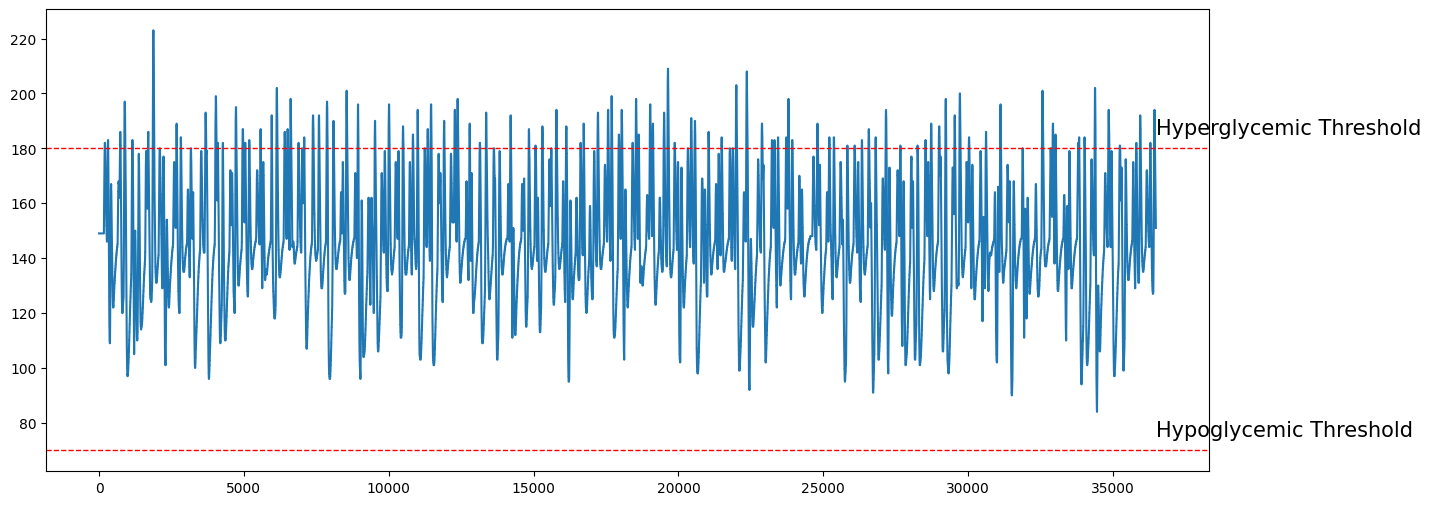

In [61]:
import matplotlib.pyplot as plt

data_from_cap_processed.BG.plot(figsize=(15,6))
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.text(len(data_from_cap_processed['Time']),185,'Hyperglycemic Threshold',size=15)
plt.text(len(data_from_cap_processed['Time']),75,'Hypoglycemic Threshold',size=15)
plt.show()

In [30]:
corr_data_from_cap_processed = data_from_cap.corr()
corr_data_from_cap_processed

<ipython-input-30-630657e6bb8c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data_from_cap_processed = data_from_cap.corr()


,BG,Hour
BG,1.000000,0.227362
Hour,0.227362,1.000000


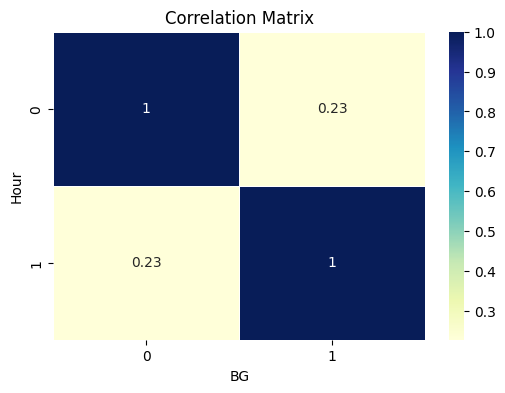

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


# Define the correlation matrix
correlation_matrix = np.array(corr_data_from_cap_processed)

# Create a heatmap plot
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True,linewidths=.5,cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.xlabel('BG')
plt.ylabel('Hour')
plt.show()

Forecasting BG Using LSTM Model

In [79]:
data_from_cap_processed.iloc[:,0].values

array(['01-05-2019 00:00', '01-05-2019 00:03', '01-05-2019 00:06', ...,
       '15-07-2019 23:51', '15-07-2019 23:54', '15-07-2019 23:57'],
      dtype=object)

In [82]:
from sklearn.preprocessing import MinMaxScaler

# features to train
X_features = data_from_cap_processed.iloc[:,1:2].values

#normlise X_features
scaler = MinMaxScaler(feature_range=(0,1))
scaled_X_features = scaler.fit_transform(X_features)

print("features shape : ",scaled_X_features.shape)

def create_sequences(data, sequence_length):
  Features = []
  labels = []
  train_record_number = 1824
  for i in range(180, train_record_number):
      Features.append(scaled_X_features[i-180:i, 0])
      labels.append(scaled_X_features[i, 0])

  return np.array(Features)


def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length]['Scaled_BG'].values
        target = data.iloc[i+sequence_length]['Scaled_BG']
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Set your desired sequence length (e.g., 3 hours)
sequence_length = 3

# Create sequences and targets
X, y = create_sequences(df, sequence_length)


features shape :  (36480, 1)
features shape :  (1644, 180)


In [90]:
scaled_X_features[:10]

array([[0.4676259],
       [0.4676259],
       [0.4676259],
       [0.4676259],
       [0.4676259],
       [0.4676259],
       [0.4676259],
       [0.4676259],
       [0.4676259],
       [0.4676259]])

In [91]:
Features[:10]

array([[0.4676259 , 0.4676259 , 0.4676259 , ..., 0.55395683, 0.56834532,
        0.57553957],
       [0.4676259 , 0.4676259 , 0.4676259 , ..., 0.56834532, 0.57553957,
        0.58273381],
       [0.4676259 , 0.4676259 , 0.4676259 , ..., 0.57553957, 0.58273381,
        0.5971223 ],
       ...,
       [0.4676259 , 0.4676259 , 0.4676259 , ..., 0.62589928, 0.63309353,
        0.64028777],
       [0.4676259 , 0.4676259 , 0.4676259 , ..., 0.63309353, 0.64028777,
        0.64748201],
       [0.4676259 , 0.4676259 , 0.4676259 , ..., 0.64028777, 0.64748201,
        0.6618705 ]])

In [19]:
data_from_cap[data_from_cap.Hour==6].iloc[:,:2].head(20)

,Time,BG
120,01-05-2019 06:00,149
121,01-05-2019 06:03,149
122,01-05-2019 06:06,149
123,01-05-2019 06:09,149
124,01-05-2019 06:12,149
125,01-05-2019 06:15,149
126,01-05-2019 06:18,149
127,01-05-2019 06:21,149
128,01-05-2019 06:24,149
129,01-05-2019 06:27,149


GlucForecast v.2

In [23]:
# Cell 2

# Set initial variables
print('\nBegin Part 2 of 19 - Set variables\n')

# Set train_YN to Y if actual training needs to be done.  If just runnin against the test set,
# then set to N.
train_YN = 'Y'

# Set initial_path
initial_path = '/home/pace/glucose/data_files/adolescent-2160-0-Dexcom-Cozmo-Basal/'

input_train_file_name_prefix = 'adolescent#001'
input_test_file_name_prefix = 'adolescent#001'

# Determine if data should be plotted
plot_data = 'Y' # Values are Y or N

# Set processed_train_file_name and processed_test_file_name
processed_train_file_name = input_train_file_name_prefix + '-train-processed.csv'
processed_test_file_name = input_test_file_name_prefix + '-test-processed.csv'

# Set value of how many records to use depending on training set size
# If training set size is 2160 hours, use 1824
train_record_number = 1824

# Set value of how many records to use depending on test set size
# If training set size is 2160 hours, use 396
test_record_number = 396

# Number of epochs to run
num_epochs = 100
# Batch size
training_batch_size = 32
# Set initial loss value to 0.  This is needed for printing the graph if training is not run.
loss = 0

# Model file
model_file = 'Model_Metadata.h5'

print('\nFinished Part 2 of 19 - Set variables.  Ready to move to next cell.')


Begin Part 2 of 19 - Set variables


Finished Part 2 of 19 - Set variables.  Ready to move to next cell.


In [20]:
test_df = pd.read_csv("/content/adolescent#001-test-processed.csv", index_col=False)
train_df = pd.read_csv("/content/adolescent#001-train-processed.csv", index_col=False)

print('\nFinished Part 6 of 19 - Open and read processed files.  Ready to move to next cell.')


Finished Part 6 of 19 - Open and read processed files.  Ready to move to next cell.


In [21]:
# Cell 4

# Group by date
print('\nBegin Part 7 of 19 - Group by date\n')

# Group BG levels by Date and Hour in both df.  means is a Series object.
train_means = train_df['BG'].groupby([train_df['Date'], train_df['Hour']]).mean()
print('Finished grouping by date for train')

test_means = test_df['BG'].groupby([test_df['Date'], test_df['Hour']]).mean()
print('Finished grouping by date for test')

print('\nFinished Part 7 of 19 - Group by date.  Ready to move to next cell.')


Begin Part 7 of 19 - Group by date

Finished grouping by date for train
Finished grouping by date for test

Finished Part 7 of 19 - Group by date.  Ready to move to next cell.


In [22]:
train_means

Date        Hour
2019-05-01  0       149.020011
            1       149.020366
            2       149.021754
            3       149.024030
            4       149.026563
                       ...    
2019-07-15  19      130.186227
            20      165.031350
            21      192.444889
            22      181.034648
            23      159.858921
Name: BG, Length: 1824, dtype: float64


Begin Part 8 of 19 - Plot train and test data



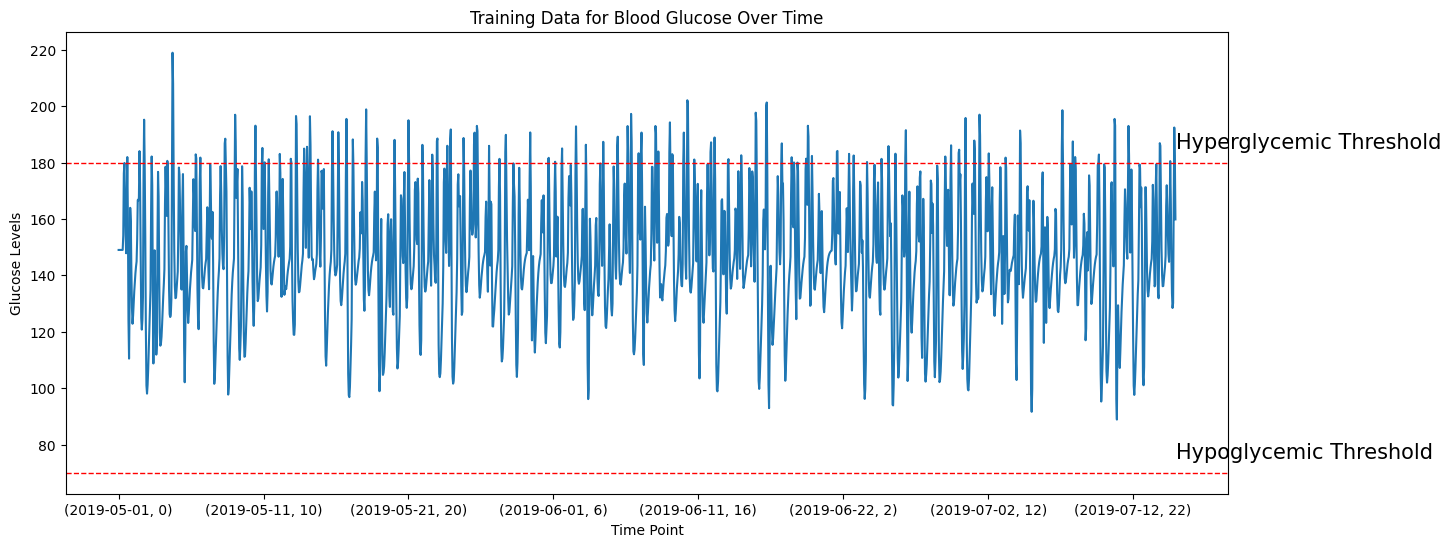

Beginning date for train_means
Date        Hour
2019-05-01  0       149.020011
Name: BG, dtype: float64
Ending date for train_means
Date        Hour
2019-07-15  23      159.858921
Name: BG, dtype: float64


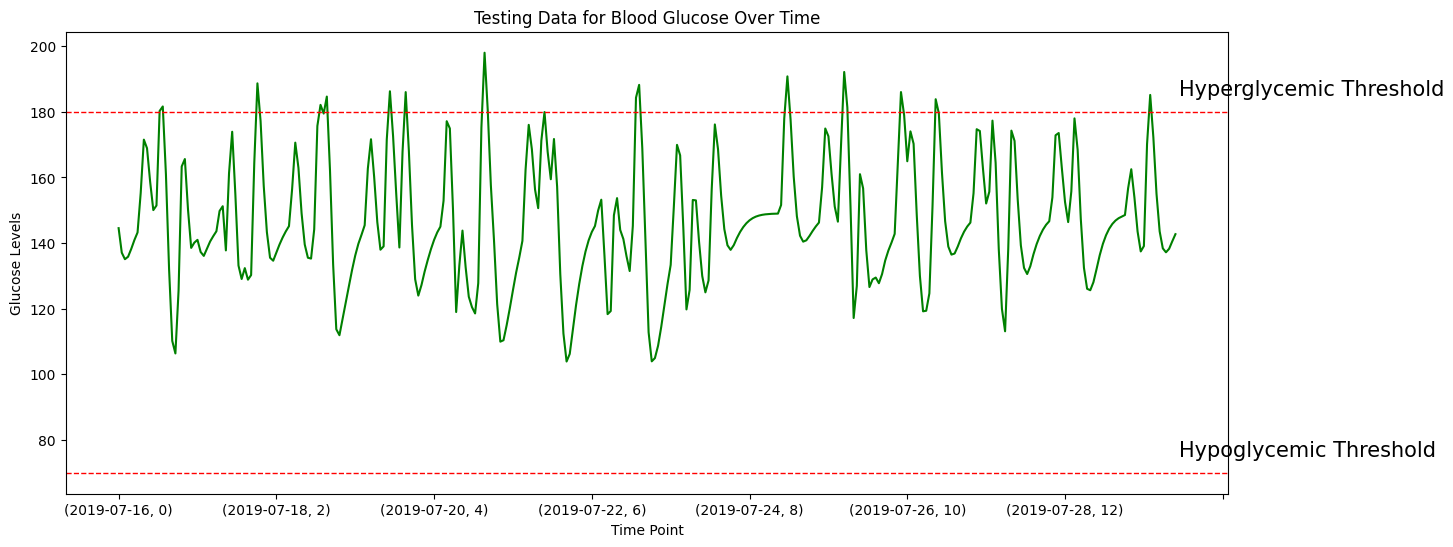

Beginning date for test_means
Date        Hour
2019-07-16  0       144.555197
Name: BG, dtype: float64
Ending date for test_means
Date        Hour
2019-07-29  23      142.72328
Name: BG, dtype: float64

Finished Part 8 of 19 - Plot train and test data.  Ready to move to next cell.


In [43]:
# Cell 5

# Plot test and train data
print('\nBegin Part 8 of 19 - Plot train and test data\n')

# Plot means
if(plot_data == 'Y'):
  plt.figure(figsize=(15,6))
  train_means.plot(kind='line', title='Training Data for Blood Glucose Over Time')
  plt.xlabel('Time Point')
  plt.ylabel('Glucose Levels')
  plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
  plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
  plt.text(len(train_means),185,'Hyperglycemic Threshold',size=15)
  plt.text(len(train_means),75,'Hypoglycemic Threshold',size=15)
  plt.show()

  print('Beginning date for train_means')
  print(train_means[[0]])
  print('Ending date for train_means')
  print(train_means[[len(train_means) - 1]])

if(plot_data == 'Y'):
  plt.figure(figsize=(15,6))
  test_means.plot(kind='line', color='green', title='Testing Data for Blood Glucose Over Time' )
  plt.xlabel('Time Point')
  plt.ylabel('Glucose Levels')
  plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
  plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
  plt.text(len(test_means),185,'Hyperglycemic Threshold',size=15)
  plt.text(len(test_means),75,'Hypoglycemic Threshold',size=15)
  plt.show()

  print('Beginning date for test_means')
  print(test_means[[0]])
  print('Ending date for test_means')
  print(test_means[[len(test_means) - 1]])

print('\nFinished Part 8 of 19 - Plot train and test data.  Ready to move to next cell.')

In [46]:
# Cell 6

# Add each element of train_means to train_glucose_df

print('Begin adding elements to train_glucose_df')
train_glucose_df = pd.DataFrame(columns=['Date_Hour', 'Glucose_Level'])
for i in range(0, len(train_means)):
  temp_date = train_means.index[[i][0]]
  temp_date_hour = str(temp_date[0]) + ' ' + str(temp_date[1])
  train_glucose_level = train_means[[i][0]]
  train_glucose_df.loc[len(train_glucose_df)] = [temp_date_hour, train_glucose_level]
print('Finished adding elements to train_glucose_df')

print('Begin adding elements to test_glucose_df')
test_glucose_df = pd.DataFrame(columns=['Date_Hour', 'Glucose_Level'])
for i in range(0, len(test_means)):
  temp_date = test_means.index[[i][0]]
  temp_date_hour = str(temp_date[0]) + ' ' + str(temp_date[1])
  test_glucose_level = test_means[[i][0]]
  test_glucose_df.loc[len(test_glucose_df)] = [temp_date_hour, test_glucose_level]
print('Finished adding elements to test_glucose_df')

train_glucose_df


Begin Part 9 of 19 - Add elements to train_glucose_df and test_glucose_df

Begin adding elements to train_glucose_df
Finished adding elements to train_glucose_df
Begin adding elements to test_glucose_df
Finished adding elements to test_glucose_df

Finished Part 9 of 19 - Add elements to train_glucose_df and test_glucose_df.  Ready to move to next cell.


In [47]:
train_glucose_df

,Date_Hour,Glucose_Level
0,2019-05-01 0,149.020011
1,2019-05-01 1,149.020366
2,2019-05-01 2,149.021754
3,2019-05-01 3,149.024030
4,2019-05-01 4,149.026563
...,...,...
1819,2019-07-15 19,130.186227
1820,2019-07-15 20,165.031350
1821,2019-07-15 21,192.444889
1822,2019-07-15 22,181.034648
